In [41]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

# Load the pooled hidden states
pooled_hidden_states = np.load('pooled_hidden_states.npy')
num_clips = 450 # total number of video clips
num_frames = 32 # number of frames per clip, depends on how you pad with grey pngs but should be 32

# Display basic information about the loaded data
print(f"Shape of pooled hidden states: {pooled_hidden_states.shape}")

Shape of pooled hidden states: (14850, 768)


In [33]:
def reshape_and_process(hidden_states, num_clips, num_frames):
    hidden_transpose = hidden_states.transpose()

    # print to verify transposed shape
    # print(f'shape of transposed states is: {hidden_transpose.shape}')

    # reshape the data to split it into clips and frames 
    segments = hidden_transpose.reshape(768, num_clips, num_frames)

    # normalize to max and min of each unit
    min_values = segments.min(axis=(1, 2), keepdims=True)
    max_values = segments.max(axis=(1, 2), keepdims=True)
    normalized_activations = (segments - min_values) / (max_values - min_values)

    return normalized_activations

In [42]:
normalized_activations = reshape_and_process(pooled_hidden_states, num_clips=num_clips, num_frames=num_frames)

In [43]:
# Define data types and their ranges
data_types = {'all': [0, 450],
              'natural_set': [0, 295],
              'repeated': [295, 320],
              'artificial': [320, 350],
              'gaudy': [350, 380],
              'spliced': [380, 400],
              'interleaved': [400, 420],
              'shuffled': [420, 440],
              'randomized_images': [440, 450]
             }


In [44]:
# Function to plot ANN responses over frames of specified clip type
def plot_data(data_type_key):
    start, end = data_types[data_type_key]

    hidden_units_to_plot = range(8)  # Adjust the range to select different hidden units if needed
    # Determine the number of rows needed for the given number of hidden units and columns
    n_cols = 2
    n_rows = (len(hidden_units_to_plot) + 1) // n_cols

    # Create a figure and subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 20), sharex=True)
    axes = axes.flatten()

        
    # Plot the activations for each selected hidden unit
    for i, hidden_unit_index in enumerate(hidden_units_to_plot):
        for clip in range(start, end):
            axes[i].plot(normalized_activations[hidden_unit_index][clip])
            # axes[i].imshow(normalized_activations[hidden_unit_index][clip])
        axes[i].set_title(f'Hidden Unit {hidden_unit_index + 1}')
        axes[i].set_ylabel('Activation')

    # Set the x-axis label for the last subplot in each column
    for ax in axes[-n_cols:]:
        ax.set_xlabel('Frame Index')

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout for better spacing
    plt.tight_layout()
    # plt.savefig(f'maxpool_hidden_units_{data_type_key}.png')
    plt.show()

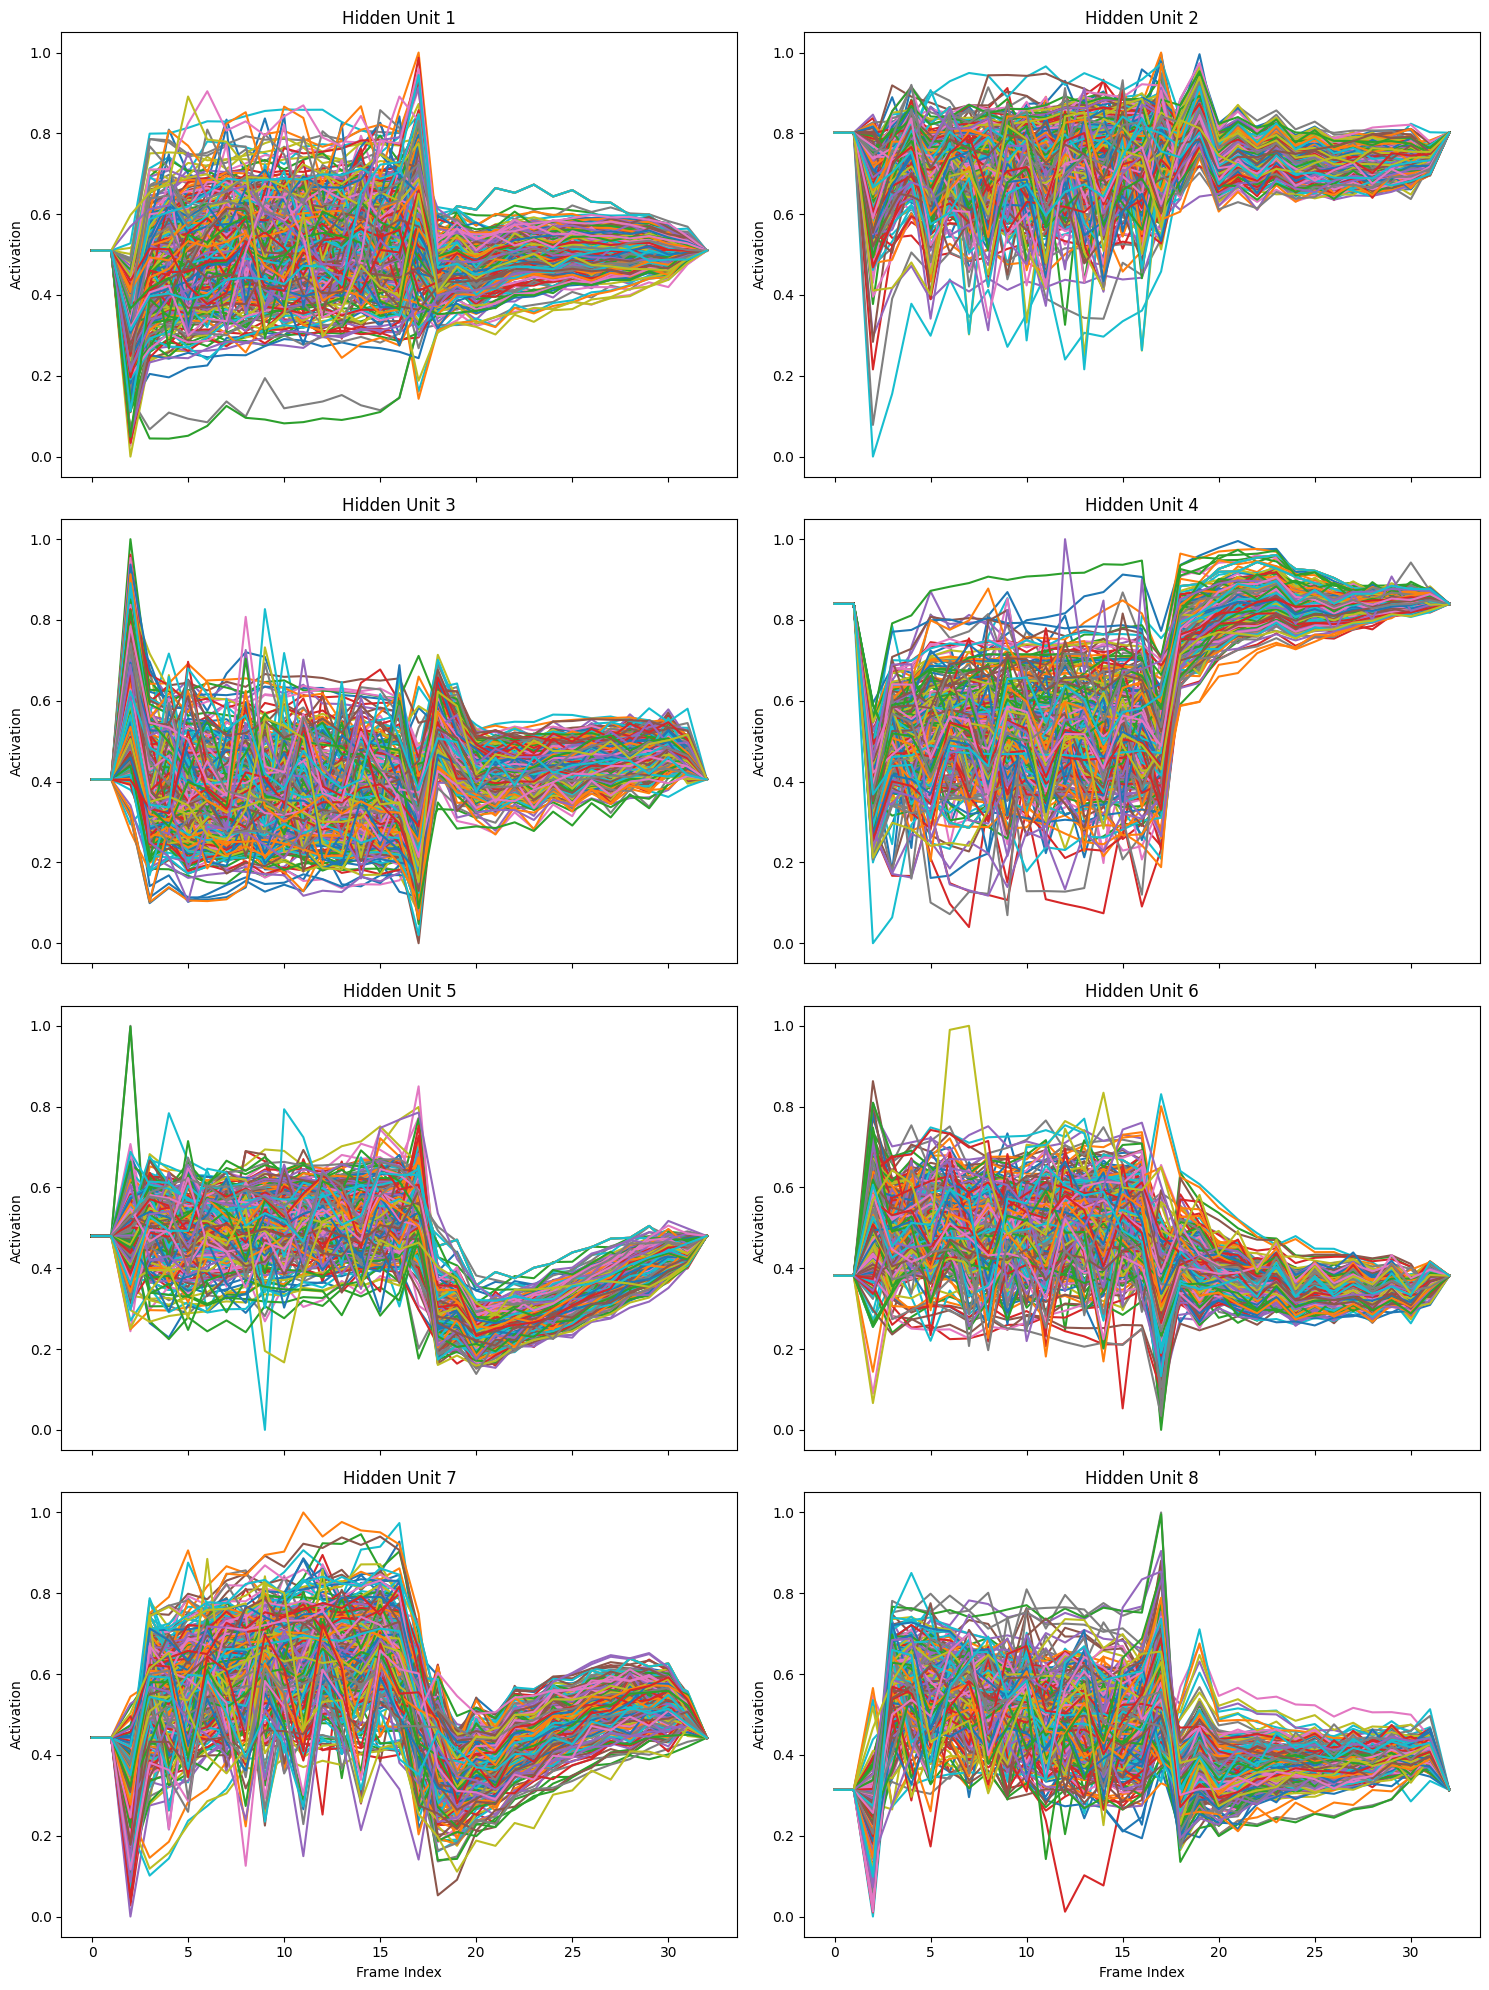

In [36]:
plot_data('all')

In [47]:
custom_ticks = [0, 294, 319, 349, 379, 399, 419, 439]
custom_labels = ['Natural', 'Repeated', 'Artificial', 'Gaudy', 'Spliced', 'Interleaved', 'Shuffled', 'Randomized']

# Function to plot ANN responses as heatmaps
def heatmap_data(start, end):

    hidden_units_to_plot = range(start, end)  # Adjust the range to select different hidden units if needed
    # Determine the number of rows needed for the given number of hidden units and columns
    n_cols = 5
    n_rows = (len(hidden_units_to_plot) + 1) // n_cols

    # Create a figure and subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10), sharex=True)
    axes = axes.flatten()

        
    # Plot the activations for each selected hidden unit
    for i, hidden_unit_index in enumerate(hidden_units_to_plot):
        im = axes[i].imshow(normalized_activations[hidden_unit_index], aspect='auto')
        axes[i].set_title(f'Hidden Unit {hidden_unit_index + 1}')
        axes[i].set_ylabel('Activation')
        axes[i].set_yticks(custom_ticks)
        if i % n_cols == 0:
            axes[i].set_yticklabels(custom_labels, va='top')
        else:
            axes[i].axis('off')

    fig.colorbar(im, ax=axes, orientation='vertical', fraction=0.02, pad=0.04)

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout for better spacing
    # plt.tight_layout()
    plt.show()

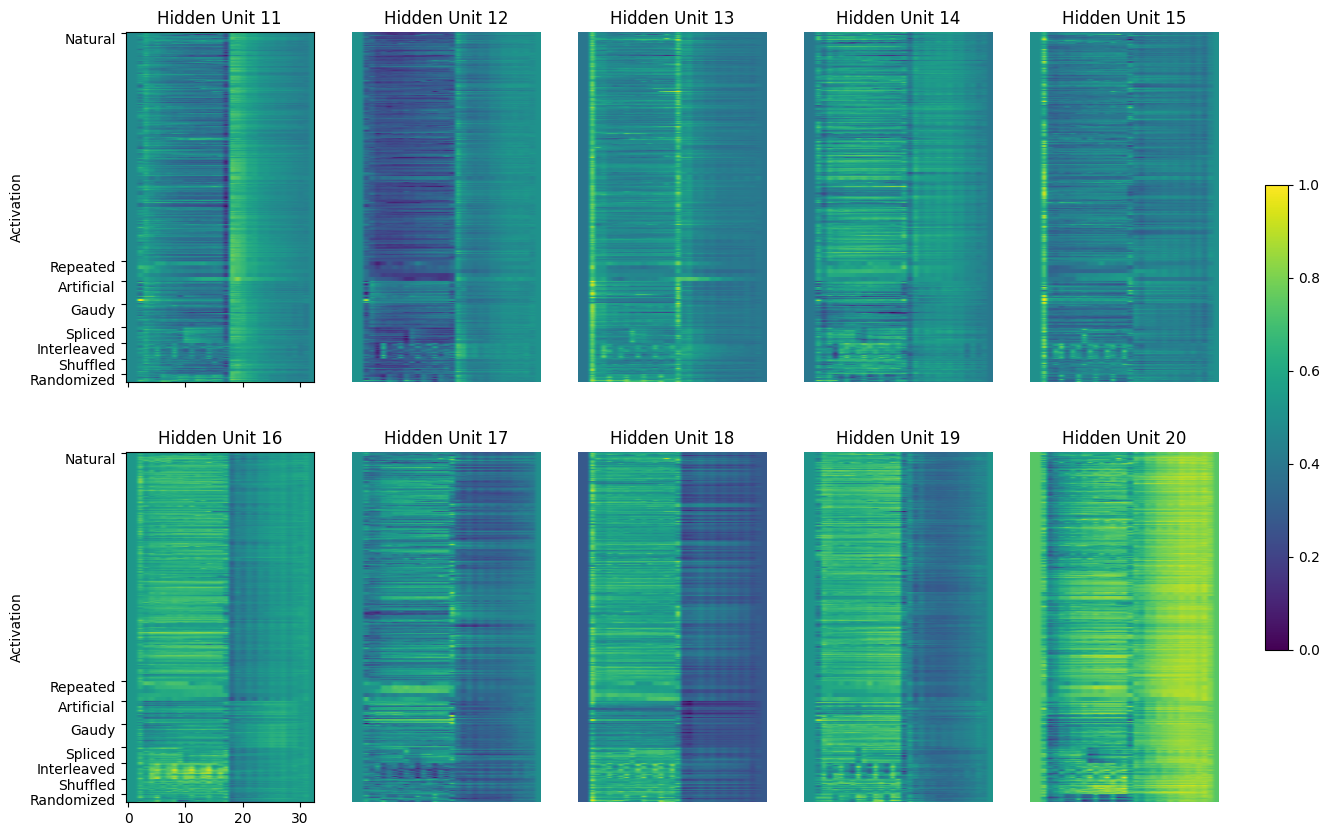

In [29]:
heatmap_data(10,20)

In [110]:
# Sum up activation activity for each neuron per clip 
summed_activations = np.sum(normalized_activations, axis=2)
summed_activations.shape

(768, 450)

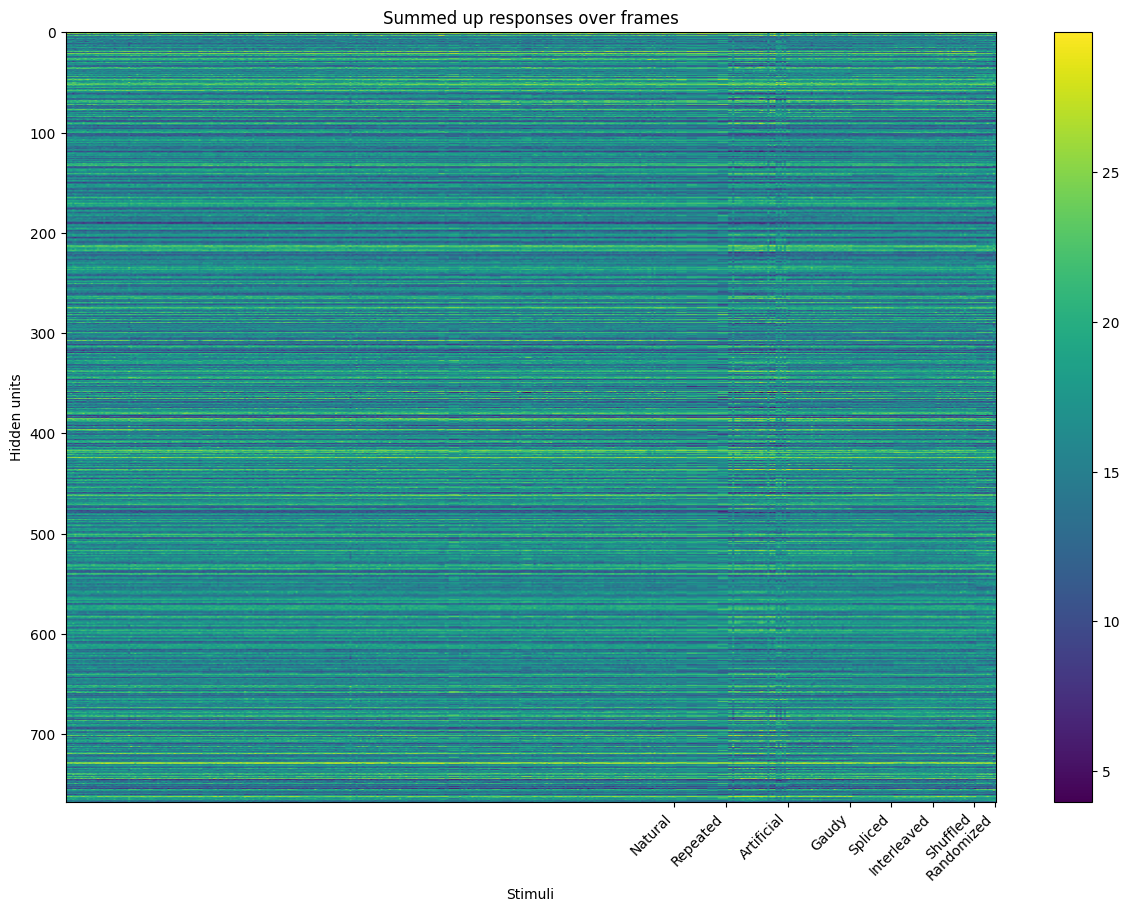

In [111]:
# Adjust the figure size to make it taller
fig, ax = plt.subplots(figsize=(15, 10))  # Adjust the height relative to the width

# Plot the data using imshow
cax = ax.imshow(summed_activations, aspect='auto', cmap='viridis')

# Add a colorbar
fig.colorbar(cax)

# Set custom x-axis ticks

ax.set_xticks(custom_ticks)

# Set custom x-axis tick labels

ax.set_xticklabels(custom_labels, rotation=45, ha='right')

# Add title and labels
ax.set_title('Summed up responses over frames')
ax.set_xlabel('Stimuli')
ax.set_ylabel('Hidden units')
# plt.savefig(f'{video}_{monkey}_avg_response_heatmap.png')
# Show the plot
plt.show()